# Тестовое задание на стажировку VK, осень 2024.

Горбунцов Александр Алексеевич

goralex02@yandex.ru


@Koftarik

+79167127207

## EDA

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
train = pd.read_parquet('data/train.parquet')
test = pd.read_parquet('data/test.parquet')

# Анализ структуры данных
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      80000 non-null  int64  
 1   dates   80000 non-null  object 
 2   values  80000 non-null  object 
 3   label   80000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20000 non-null  int64 
 1   dates   20000 non-null  object
 2   values  20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB
None


In [63]:
print(train.head(5))
print(test.head(5))

      id                                              dates  \
0  19114  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
1  22769  [2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...   
2  76935  [2017-03-01, 2017-04-01, 2017-05-01, 2017-06-0...   
3  66297  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
4   2191  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   

                                              values  label  
0  [-1.86, 0.79, 1.4, 0.15, 0.0, -1.24, -1.46, 3....    0.0  
1  [-1.04, -3.48, 0.05, -0.13, -0.01, 0.03, 0.27,...    1.0  
2  [0.28, 0.63, 0.06, 0.96, -1.4, -0.3, 1.62, 1.1...    0.0  
3  [-0.33, 0.58, 1.1, -0.56, -0.95, -0.61, -0.7, ...    0.0  
4  [1.31, 0.5, -0.54, 0.95, 0.65, 0.83, -1.55, -0...    0.0  
      id                                              dates  \
0   6125  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
1  26781  [2016-01-01, 2016-02-01, 2016-03-01, 2016-04-0...   
2  13333  [2016-06-01, 2016-07-01, 2016-08-01, 2016-09-0... 

Количество классов:
label
0.0    57820
1.0    22180
Name: count, dtype: int64


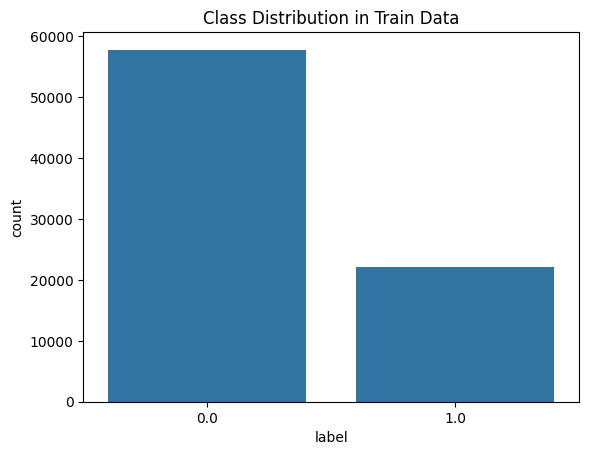

In [64]:
# Посчитаем количество значений для каждого класса
class_counts = train['label'].value_counts()
print(f"Количество классов:\n{class_counts}")

# Проверим распределение классов
sns.countplot(x='label', data=train)
plt.title("Class Distribution in Train Data")
plt.show()

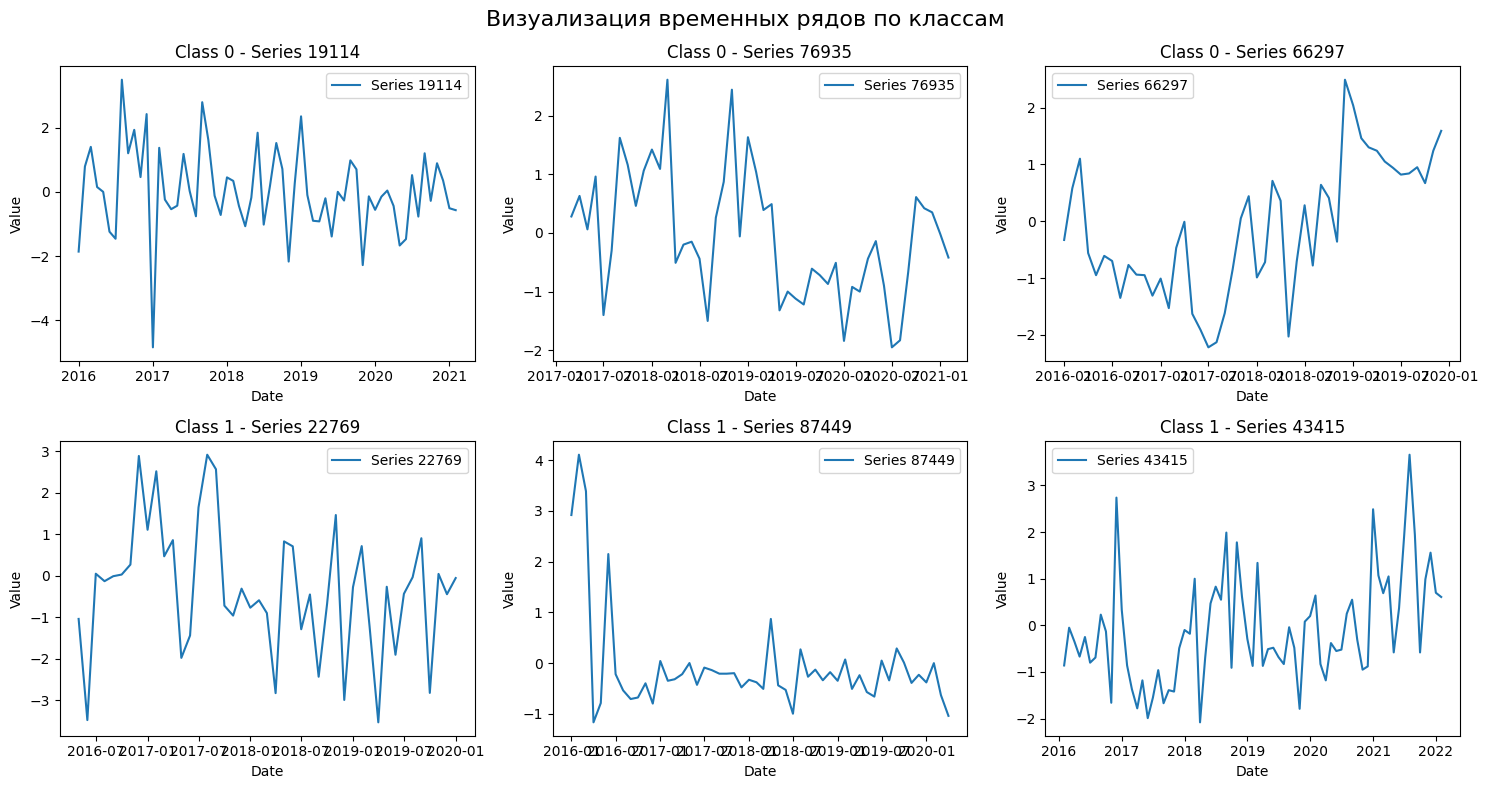

In [65]:
# Настройка figure и subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle("Визуализация временных рядов по классам", fontsize=16)

labels = [0, 1]
for label_idx, label in enumerate(labels):
    class_data = train[train['label'] == label]
    for i in range(3):
        series_data = class_data.iloc[i]
        ax = axes[label_idx, i]  # Выбираем правильный subplot
        ax.plot(series_data['dates'], series_data['values'], label=f"Series {series_data['id']}")
        ax.set_title(f"Class {label} - Series {series_data['id']}")
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()

plt.tight_layout()  # Улучшаем распределение графиков
plt.show()

In [66]:
import numpy as np

# Функция для преобразования массива значений в список чисел (если это необходимо)
def convert_to_float_list(values):
    if isinstance(values, str):  # Если данные представлены как строка
        return list(map(float, values.strip('[]').split(',')))
    elif isinstance(values, np.ndarray):  # Если данные уже массив
        return values.tolist()
    else:
        return values  # Оставляем как есть, если это уже список

# Применяем преобразование к 'values'
train['values'] = train['values'].apply(convert_to_float_list)
test['values'] = test['values'].apply(convert_to_float_list)


In [67]:
# Функция для проверки, что все значения в списке - это NaN
def is_all_nan(value_list):
    return all(np.isnan(value) for value in value_list)

In [68]:
# Проверка, остались ли строки с полностью NaN
nan_rows_train = train[train['values'].apply(is_all_nan)]
nan_rows_test = test[test['values'].apply(is_all_nan)]

print(f"Строк с [nan, nan, nan] в тренировочной выборке: {len(nan_rows_train)}")
print(f"Строк с [nan, nan, nan] в тестовой выборке: {len(nan_rows_test)}")

Строк с [nan, nan, nan] в тренировочной выборке: 88
Строк с [nan, nan, nan] в тестовой выборке: 21


In [69]:
print(nan_rows_train.head(5))

         id                                              dates  \
1979  95215  [2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...   
2328  56091  [2020-04-01, 2020-05-01, 2020-06-01, 2020-07-0...   
3244  63162  [2017-12-01, 2018-01-01, 2018-02-01, 2018-03-0...   
3315  29359  [2016-11-01, 2016-12-01, 2017-01-01, 2017-02-0...   
3873  12983  [2016-02-01, 2016-03-01, 2016-04-01, 2016-05-0...   

                                                 values  label  
1979  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...    1.0  
2328  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...    1.0  
3244  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...    0.0  
3315  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...    0.0  
3873  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...    0.0  


In [70]:
print(nan_rows_test.head(5))

         id                                              dates  \
361    5992  [2016-03-01, 2016-04-01, 2016-05-01, 2016-06-0...   
922   70218  [2016-05-01, 2016-06-01, 2016-07-01, 2016-08-0...   
2193  70630  [2017-08-01, 2017-09-01, 2017-10-01, 2017-11-0...   
4050  44222  [2020-04-01, 2020-05-01, 2020-06-01, 2020-07-0...   
6260  85761  [2020-04-01, 2020-05-01, 2020-06-01, 2020-07-0...   

                                                 values  
361   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  
922   [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  
2193  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  
4050  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  
6260  [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...  


In [71]:
# 88 строк из 80,000 — это незначительная потеря данных (примерно 0.1%)

# Удаляем строки с полностью NaN values из тренировочной выборки
train_cleaned = train[~train['values'].apply(is_all_nan)].reset_index(drop=True)

# Выводим количество строк после удаления
print(f"Количество строк в очищенной тренировочной выборке: {len(train_cleaned)}")

# Оставляем тестовые данные как есть
test_cleaned = test.copy()

print(f"Количество строк в тестовой выборке: {len(test_cleaned)}")


Количество строк в очищенной тренировочной выборке: 79912
Количество строк в тестовой выборке: 20000


## Генерация признаков

In [72]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis

# Функция для генерации признаков на основе временного ряда
def generate_features(data):
    features = pd.DataFrame()
    features['id'] = data['id']

    # Рассчитываем статистические признаки
    features['mean'] = data['values'].apply(np.mean)
    features['std'] = data['values'].apply(np.std)  # Оставляем std вместо variance
    features['min'] = data['values'].apply(np.min)
    features['max'] = data['values'].apply(np.max)
    features['median'] = data['values'].apply(np.median)

    # Дополнительные статистические признаки
    features['kurtosis'] = data['values'].apply(lambda x: kurtosis(x) if len(x) > 1 else 0)  # Куртозис

    # Автокорреляция с лагом 1
    features['autocorr'] = data['values'].apply(lambda x: pd.Series(x).autocorr(lag=1))

    # Размах (Range)
    features['range'] = features['max'] - features['min']


    # Количество пиков (локальные максимумы)
    features['peaks'] = data['values'].apply(lambda x: len(pd.Series(x).diff().fillna(0).ge(0).astype(int).diff().fillna(0).lt(0)))
    # Лаговые признаки
    for lag in range(1, 4):
        features[f'lag_{lag}'] = data['values'].apply(lambda x: x[-lag] if len(x) > lag else np.nan)

    # Скользящие статистики
    features['rolling_mean'] = data['values'].apply(lambda x: pd.Series(x).rolling(window=3).mean().iloc[-1])
    features['rolling_std'] = data['values'].apply(lambda x: pd.Series(x).rolling(window=3).std().iloc[-1])

    return features

# Генерация признаков для тренировочной и тестовой выборки
train_features = generate_features(train_cleaned)
test_features = generate_features(test_cleaned)

# Добавляем метку класса в тренировочные признаки
train_features['label'] = train_cleaned['label']

print(train_features.head())
print(test_features.head())


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


      id      mean       std       min   max    median  kurtosis  autocorr  \
0  19114  0.023710  1.337272 -4.840000  3.49 -0.110000  1.889654 -0.113649   
1  22769 -0.310777  1.556337 -3.534409  2.92 -0.274409 -0.107257  0.189858   
2  76935 -0.046042  1.065023 -1.950000  2.61 -0.145000 -0.272738  0.501409   
3  66297 -0.130000  1.158201 -2.220000  2.49 -0.345000 -0.849629  0.705215   
4   2191 -0.270536  1.270529 -2.500000  2.87 -0.475000 -0.587199  0.088913   

      range  peaks     lag_1     lag_2     lag_3  rolling_mean  rolling_std  \
0  8.330000     62 -0.570000 -0.510000  0.350000     -0.243333     0.514717   
1  6.454409     45 -0.054409 -0.444409  0.045591     -0.151076     0.258908   
2  4.560000     48 -0.420000 -0.020000  0.350000     -0.030000     0.385097   
3  4.710000     48  1.590000  1.240000  0.670000      1.166667     0.464363   
4  5.370000     56 -0.750000 -2.500000 -1.690000     -1.646667     0.875804   

   label  
0    0.0  
1    1.0  
2    0.0  
3    0.0  
4

In [73]:
feature_columns = train_features.drop(['label', 'id'], axis=1)
print(feature_columns.columns)

Index(['mean', 'std', 'min', 'max', 'median', 'kurtosis', 'autocorr', 'range',
       'peaks', 'lag_1', 'lag_2', 'lag_3', 'rolling_mean', 'rolling_std'],
      dtype='object')


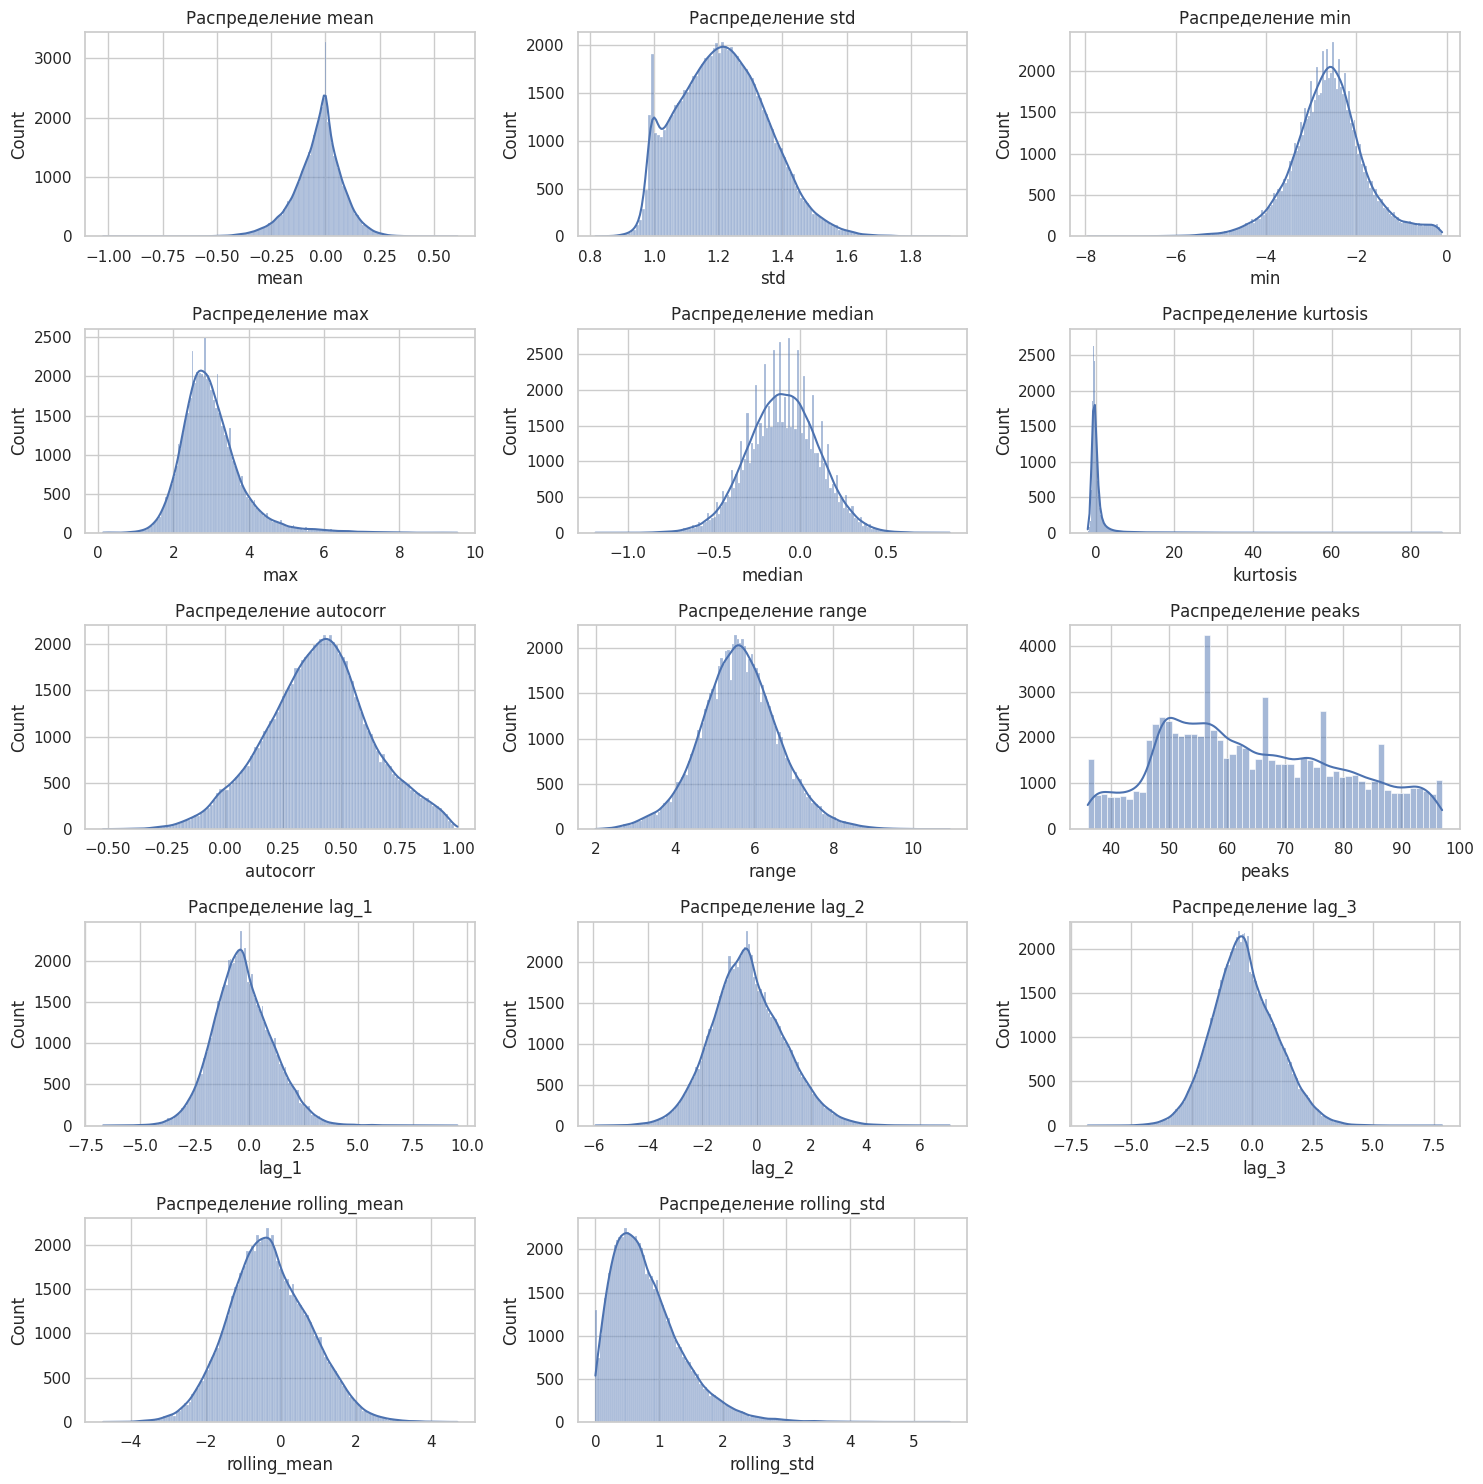

In [82]:
# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Строим гистограммы для каждого признака
plt.figure(figsize=(15, 15))
for i, col in enumerate(feature_columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(train_features[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

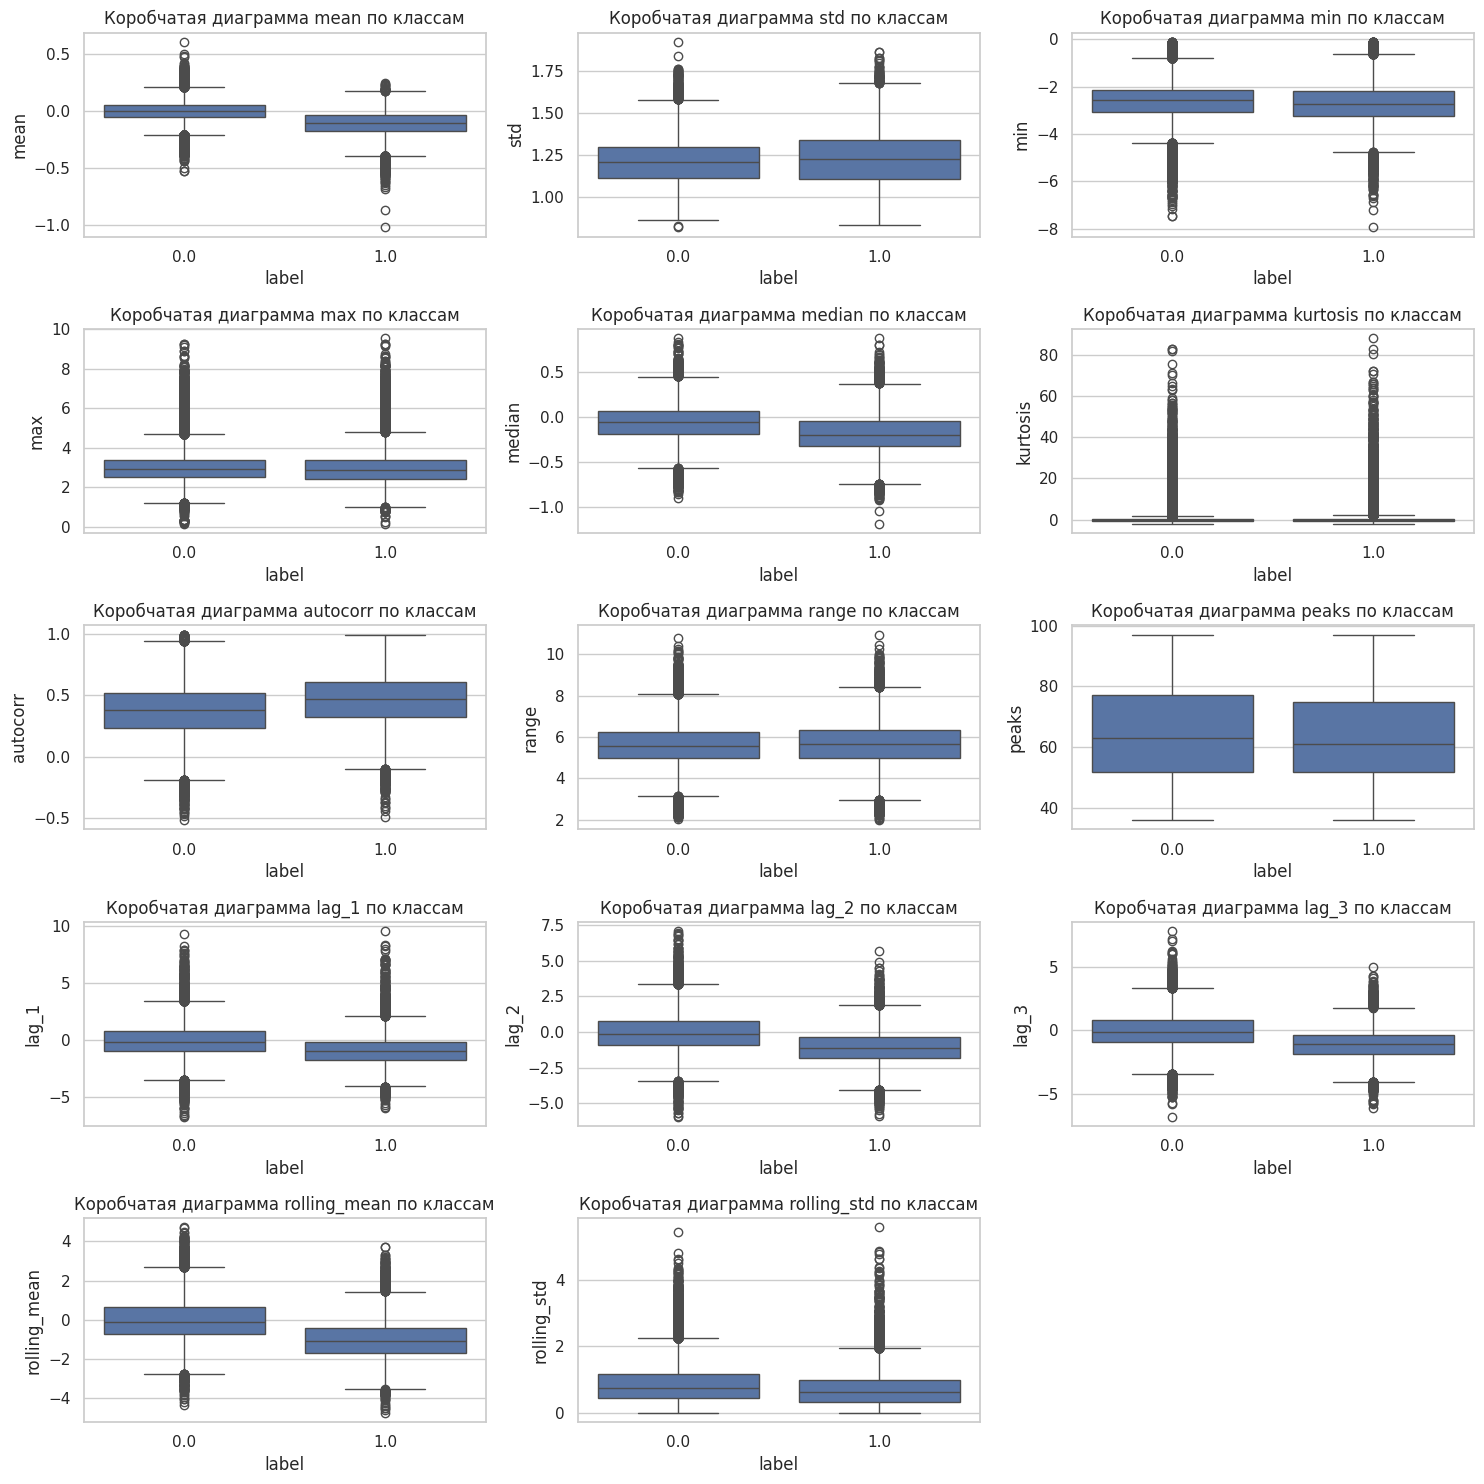

In [81]:
# Строим коробчатые диаграммы для каждого признака
plt.figure(figsize=(15, 15))
for i, col in enumerate(feature_columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x=train_features['label'], y=train_features[col])
    plt.title(f'Коробчатая диаграмма {col} по классам')
plt.tight_layout()
plt.show()

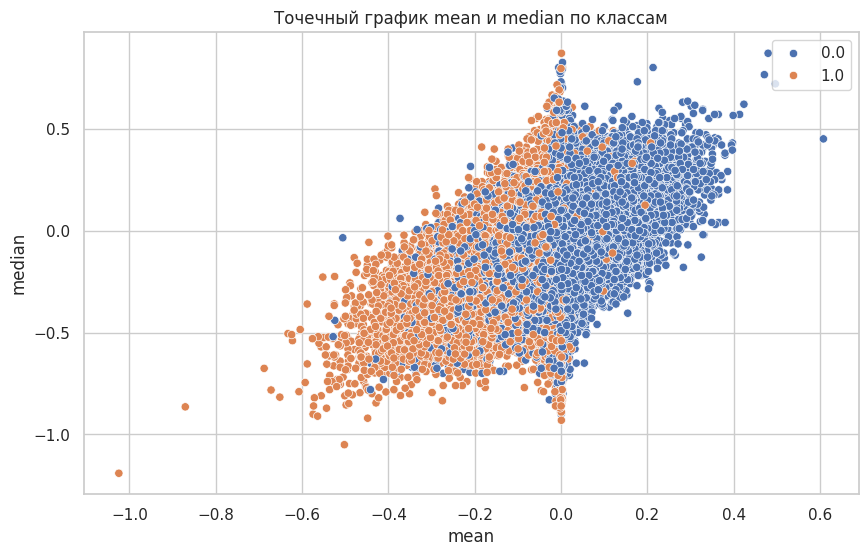

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean', y='median', hue='label', data=train_features)
plt.title('Точечный график mean и median по классам')
plt.xlabel('mean')
plt.ylabel('median')
plt.legend(loc='upper right')
plt.show()

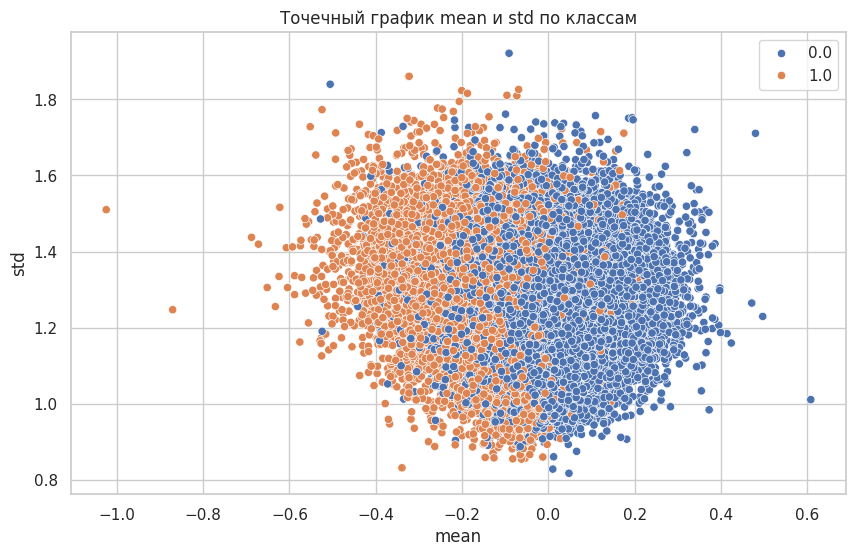

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean', y='std', hue='label', data=train_features)
plt.title('Точечный график mean и std по классам')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend(loc='upper right')
plt.show()

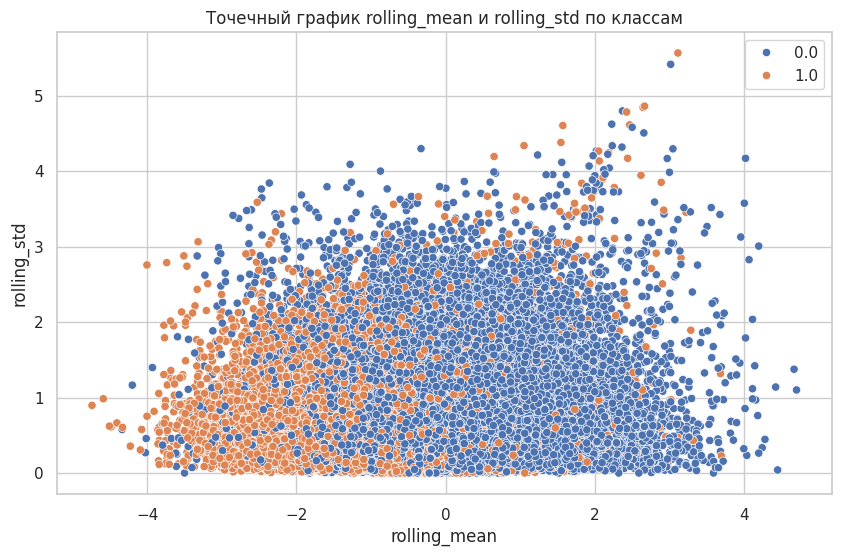

In [88]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rolling_mean', y='rolling_std', hue='label', data=train_features)
plt.title('Точечный график rolling_mean и rolling_std по классам')
plt.xlabel('rolling_mean')
plt.ylabel('rolling_std')
plt.legend(loc='upper right')
plt.show()

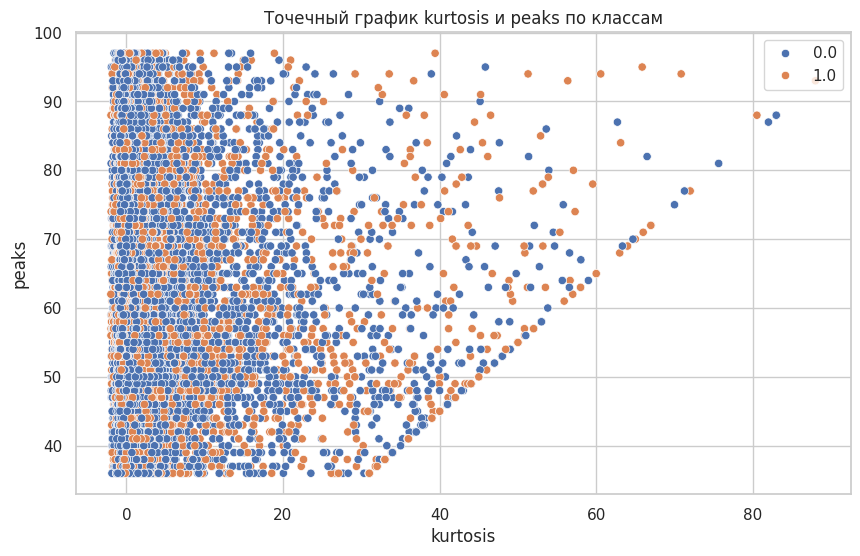

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kurtosis', y='peaks', hue='label', data=train_features)
plt.title('Точечный график kurtosis и peaks по классам')
plt.xlabel('kurtosis')
plt.ylabel('peaks')
plt.legend(loc='upper right')
plt.show()

## Подбор моделей

In [2]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier

In [91]:
# Разделяем данные на тренировочную и валидационную выборки
X = train_features.drop(columns=['id', 'label'])  # Признаки
y = train_features['label']  # Целевая переменная
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Логистическая регрессия

In [50]:
# Создаем пайплайн для логистической регрессии
logistic_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('logistic', LogisticRegression(class_weight='balanced', random_state=42))
])

# Обучаем модель
logistic_pipeline.fit(X_train, y_train)

# Прогнозируем
y_val_pred_logistic = logistic_pipeline.predict(X_val)

# Оцениваем производительность модели
roc_auc = roc_auc_score(y_val, y_val_pred_logistic)
print(f'ROC AUC для валидационной выборки: {roc_auc:.4f}')

ROC AUC для валидационной выборки: 0.7819


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Случайный лес

In [92]:
# Инициализируем и обучаем модель
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Прогнозируем вероятности для валидационной выборки
y_val_pred_f = forest_model.predict_proba(X_val)[:, 1]

# Оцениваем производительность модели
roc_auc = roc_auc_score(y_val, y_val_pred_f)
print(f'ROC AUC для валидационной выборки: {roc_auc:.4f}')

ROC AUC для валидационной выборки: 0.8912


Перцептрон

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold


# Создаем пайплайн с импутером и классификатором
mlp = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42))
])

# Обучаем модель
mlp.fit(X_train, y_train)

# Прогнозируем вероятности для валидационной выборки
y_val_pred_mlp = mlp.predict_proba(X_val)[:, 1]

# Оцениваем производительность модели
roc_auc = roc_auc_score(y_val, y_val_pred_mlp)
print(f'ROC AUC для валидационной выборки: {roc_auc:.4f}')

ROC AUC для валидационной выборки: 0.8892


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Классификатор XGBoost

In [25]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1,
                          objective='binary:logistic', random_state=42,
                          scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

xgb_model.fit(X_train, y_train)

# Прогнозируем вероятности для валидационной выборки
y_val_pred_xgb = xgb_model.predict_proba(X_val)[:, 1]

# Оцениваем производительность модели
roc_auc = roc_auc_score(y_val, y_val_pred_xgb)
print(f'ROC AUC для валидационной выборки: {roc_auc:.4f}')

ROC AUC для валидационной выборки: 0.8962


Классификатор CatBoost

In [26]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Инициализация CatBoostClassifier с автоматическими весами
cb = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    auto_class_weights='Balanced',  # Автоматическое вычисление весов классов
    verbose=0  # Отключаем вывод логов
)

cb.fit(X_train, y_train)

# Прогнозируем вероятности для валидационной выборки
y_val_pred_cb = cb.predict_proba(X_val)[:, 1]

# Оцениваем производительность модели
roc_auc = roc_auc_score(y_val, y_val_pred_cb)
print(f'ROC AUC для валидационной выборки: {roc_auc:.4f}')

ROC AUC для валидационной выборки: 0.9003


Ансамбль с перцептроном и регрессией

In [48]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression  # Импортируем LogisticRegression
import numpy as np

# Инициализация моделей с параметрами для несбалансированных данных
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', auto_class_weights='Balanced', verbose=0)
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, objective='binary:logistic', random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Инициализация MLPClassifier с учётом несбалансированности
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)

# Создаем пайплайн с импутером и классификатором для MLP
pipeline_mlp = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('mlp', mlp)
])

# Создаем пайплайн для логистической регрессии
logistic_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('logistic', LogisticRegression(class_weight='balanced', random_state=42))
])

# Данные
X_train = train_features.drop(['id', 'label'], axis=1)
y_train = train_features['label']
X_test = test_features.drop('id', axis=1)

# Список для хранения предсказаний и AUC для каждой модели
predictions = []
roc_aucs = []

# Кросс-валидация для каждой модели
for model in [catboost_model, rf_model, xgb_model, pipeline_mlp, logistic_pipeline]:
    y_pred = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]

    predictions.append(y_pred)

    # Вычисляем ROC AUC для каждой модели
    roc_auc = roc_auc_score(y_train, y_pred)
    roc_aucs.append(roc_auc)
    print(f'ROC AUC для модели {model.__class__.__name__}: {roc_auc:.4f}')

# Нормализуем веса на основе ROC AUC, чтобы их сумма была равна 1
weights = np.array(roc_aucs) / sum(roc_aucs)
print(f'Веса моделей: {weights}')

# Взвешенное предсказание для ансамбля
ensemble_pred = np.average(predictions, axis=0, weights=weights)

# Рассчитываем ROC AUC для взвешенного ансамбля моделей
roc_auc_ensemble = roc_auc_score(y_train, ensemble_pred)
print(f'ROC AUC для взвешенного ансамбля моделей: {roc_auc_ensemble:.4f}')

ROC AUC для модели CatBoostClassifier: 0.9017
ROC AUC для модели RandomForestClassifier: 0.8920
ROC AUC для модели XGBClassifier: 0.8988


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

ROC AUC для модели Pipeline: 0.8896


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

ROC AUC для модели Pipeline: 0.8667
Веса моделей: [0.20269151 0.20049534 0.2020323  0.19996397 0.19481687]
ROC AUC для взвешенного ансамбля моделей: 0.8982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Предупреждения мешают нормальному восприятию результатов, поэтому скопируем их сюда.

ROC AUC для модели CatBoostClassifier: 0.9017

ROC AUC для модели RandomForestClassifier: 0.8920

ROC AUC для модели XGBClassifier: 0.8988

ROC AUC для модели Pipeline: 0.8896

ROC AUC для модели Pipeline: 0.8667

Веса моделей: [0.20269151 0.20049534 0.2020323  0.19996397 0.19481687]

ROC AUC для взвешенного ансамбля моделей: 0.8982


Лучше всех показал себя CatBoostClassifier, хотя разница очень небольшая. Поэтому сохраним эту модель и будем использовать для дальнейших предсказаний.

## Обучение на всей выборке и сохранение

In [51]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Инициализация CatBoostClassifier с автоматическими весами
cb = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    auto_class_weights='Balanced',  # Автоматическое вычисление весов классов
    verbose=0  # Отключаем вывод логов
)

cb.fit(X, y)

In [53]:
cb.save_model('model/catboost_model.cbm')

## Предсказание на тестовой выборке и создание посылки

In [54]:
import pandas as pd

test = pd.read_parquet('data/test.parquet')

In [55]:
import numpy as np

# Функция для преобразования массива значений в список чисел (если это необходимо)
def convert_to_float_list(values):
    if isinstance(values, str):  # Если данные представлены как строка
        return list(map(float, values.strip('[]').split(',')))
    elif isinstance(values, np.ndarray):  # Если данные уже массив
        return values.tolist()
    else:
        return values  # Оставляем как есть, если это уже список

# Применяем преобразование к 'values'
test['values'] = test['values'].apply(convert_to_float_list)


In [56]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis

# Функция для генерации признаков на основе временного ряда
def generate_features(data):
    features = pd.DataFrame()
    features['id'] = data['id']

    # Рассчитываем статистические признаки
    features['mean'] = data['values'].apply(np.mean)
    features['std'] = data['values'].apply(np.std)  # Оставляем std вместо variance
    features['min'] = data['values'].apply(np.min)
    features['max'] = data['values'].apply(np.max)
    features['median'] = data['values'].apply(np.median)

    # Дополнительные статистические признаки
    features['kurtosis'] = data['values'].apply(lambda x: kurtosis(x) if len(x) > 1 else 0)  # Куртозис

    # Автокорреляция с лагом 1
    features['autocorr'] = data['values'].apply(lambda x: pd.Series(x).autocorr(lag=1))

    # Размах (Range)
    features['range'] = features['max'] - features['min']


    # Количество пиков (локальные максимумы)
    features['peaks'] = data['values'].apply(lambda x: len(pd.Series(x).diff().fillna(0).ge(0).astype(int).diff().fillna(0).lt(0)))
    # Лаговые признаки
    for lag in range(1, 4):
        features[f'lag_{lag}'] = data['values'].apply(lambda x: x[-lag] if len(x) > lag else np.nan)

    # Скользящие статистики
    features['rolling_mean'] = data['values'].apply(lambda x: pd.Series(x).rolling(window=3).mean().iloc[-1])
    features['rolling_std'] = data['values'].apply(lambda x: pd.Series(x).rolling(window=3).std().iloc[-1])

    return features

# Генерация признаков для тестовой выборки

test_features = generate_features(test_cleaned)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [60]:
from catboost import CatBoostClassifier

# Создание экземпляра модели
loaded_model = CatBoostClassifier()

# Загрузка модели
loaded_model.load_model('model/catboost_model.cbm')

In [61]:
# Предсказание на тестовых данных
test_preds = loaded_model.predict_proba(test_features.drop(columns=['id']))[:, 1]

# Создаем DataFrame для submission
submission = pd.DataFrame({
    'id': test_features['id'],
    'score': test_preds
})

# Сохраняем в submission.csv
submission.to_csv('submission.csv', index=False)
print('Файл submission.csv успешно сохранен!')

Файл submission.csv успешно сохранен!
